### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_)
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [1]:
a_min = -5
a_max = 5
a_skok = 0.05
b_min = -100
b_max = 100
b_skok = 1

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/"

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, "wb").write(r.content)

In [3]:
def hough_trans_ab(
    binary,
    a_min: float,
    a_max: float,
    a_skok: float,
    b_min: float,
    b_max: float,
    b_skok: float,
):
    B = np.arange(b_min, b_max, b_skok)
    A = np.arange(a_min, a_max, a_skok)
    H = np.zeros((B.shape[0], A.shape[0]))
    bin_x, bin_y = binary.shape
    for i in range(bin_x):
        for j in range(bin_y):
            if binary[i, j] == 1:
                for a_index in range(len(A)):
                    a_idx = a_index
                    b = i - A[a_index] * j
                    b_idx = np.argmin(abs(B - b))
                    H[b_idx, a_idx] += 1
    return H


def show_hough(h, image):
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    axs[0].imshow(image, "gray")
    axs[0].set_title("Original")
    axs[0].axis("off")
    axs[1].imshow(h, "gray")
    axs[1].set_title("After Hough transformation")
    axs[1].axis("off")
    plt.show()

### Obrazy

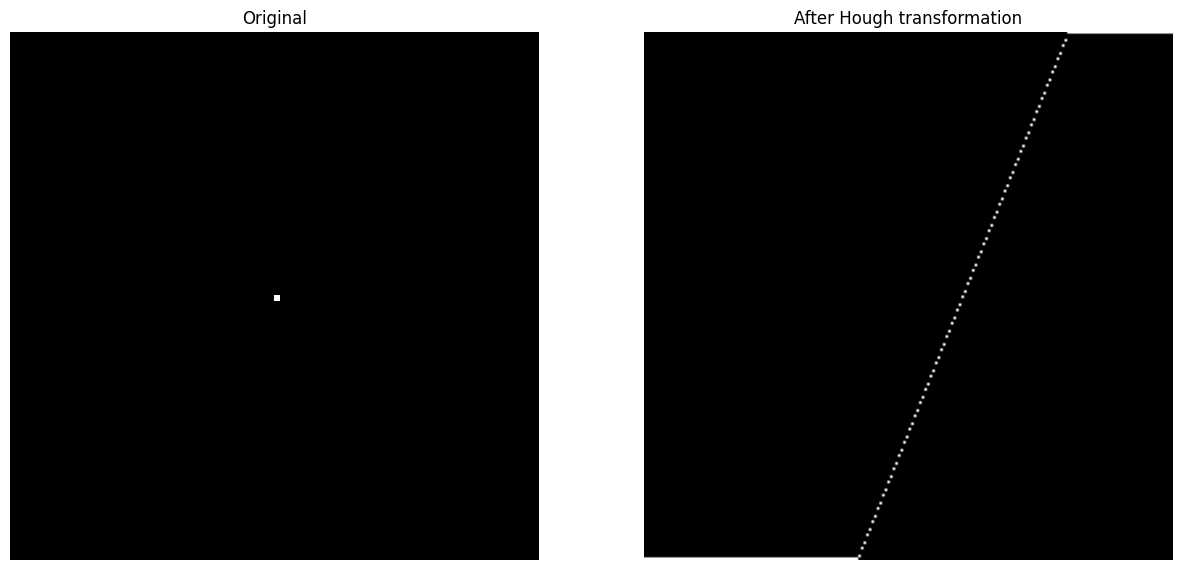

In [4]:
img = np.zeros((100, 100))
img[50, 50] = 1
hough_result = hough_trans_ab(img, a_min, a_max, a_skok, b_min, b_max, b_skok)
show_hough(hough_result, img)

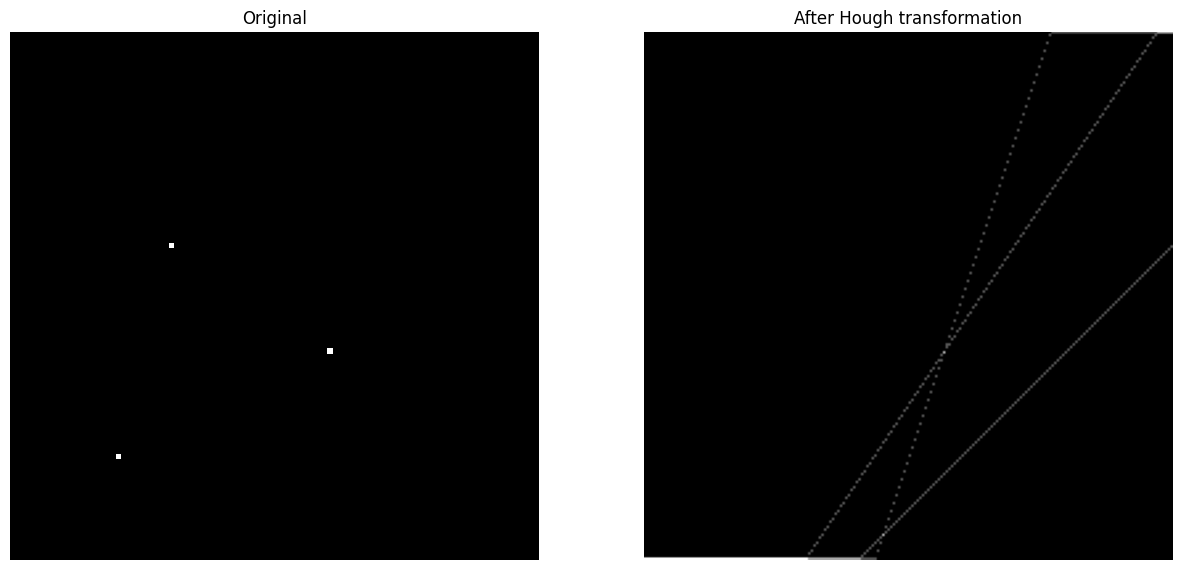

In [5]:
img = np.zeros((100, 100))
img[80, 20] = 1
img[40, 30] = 1
img[60, 60] = 1
hough_result = hough_trans_ab(img, a_min, a_max, a_skok, b_min, b_max, b_skok)
show_hough(hough_result, img)

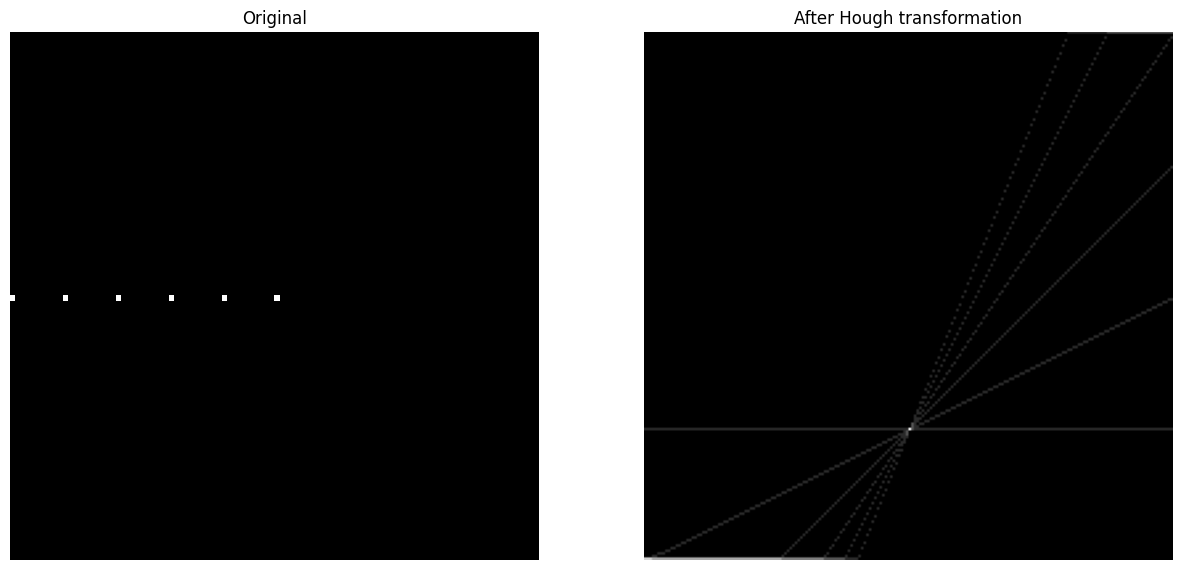

In [6]:
img = np.zeros((100, 100))
img[50, 50] = 1
img[50, 40] = 1
img[50, 30] = 1
img[50, 20] = 1
img[50, 10] = 1
img[50, 0] = 1

hough_result = hough_trans_ab(img, a_min, a_max, a_skok, b_min, b_max, b_skok)
show_hough(hough_result, img)